# Packages, libraries and dataset loading

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import openpyxl
import numpy as np
import scipy.stats as sp
import statsmodels.api as sm
from numpy.linalg import inv
import plotly.express as px
import plotly.graph_objects as go
import pandas_datareader as web

Loading the dataset

In [ ]:
# loading Returns
url1 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/returns_clean2.csv'
df_returns = pd.read_csv(url1, on_bad_lines='skip', sep=';',decimal=',')

# loading Weights
url2 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/weights_clean2.csv'
df_weights = pd.read_csv(url2, on_bad_lines='skip', sep=';',decimal=',')

#loading tot ret SPI prices
url3= 'https://raw.githubusercontent.com/mi0909/qarm/main/.SPIX.csv'
prices_spi=pd.read_csv(url3, on_bad_lines='skip', sep=';',decimal=',')

#loading 3m Swiss Libor
url4 = 'https://raw.githubusercontent.com/mi0909/qarm/main/SWISS_LIBOR3M.csv'
libor3m=pd.read_csv(url4, on_bad_lines='skip', sep=';',decimal=',')

In [ ]:
df_returns

,Unnamed: 0,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
0,1/1/00,3304.08,204.75,NaN,249.60,NaN,NaN,567.14,96.13,NaN,...,NaN,NaN,NaN,320.28,1.46,NaN,203.02,NaN,4607.43,183.40
1,2/1/00,3087.76,198.05,NaN,271.44,NaN,NaN,589.09,109.07,NaN,...,NaN,NaN,NaN,361.04,1.59,NaN,202.08,NaN,3907.18,205.41
2,3/1/00,3049.59,201.02,NaN,312.00,NaN,NaN,612.88,112.43,NaN,...,NaN,NaN,NaN,363.95,1.34,NaN,198.32,NaN,3633.17,179.73
3,4/1/00,3348.89,186.88,NaN,296.40,NaN,NaN,539.70,103.08,NaN,...,NaN,NaN,NaN,371.23,1.26,NaN,203.02,NaN,4338.49,221.91
4,5/1/00,3301.48,186.88,NaN,273.00,160.00,NaN,647.18,95.89,NaN,...,NaN,NaN,NaN,356.67,1.20,NaN,207.72,NaN,3719.44,194.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,7/1/22,3706.92,0.11,18.43,577.10,2427.12,0.29,277.33,70.35,33.83,...,87.55,204.77,202.63,1479.78,0.08,179.87,1506.87,47.37,7761.36,89.59
271,8/1/22,4223.68,0.11,18.43,577.10,2427.12,0.30,283.61,70.35,33.83,...,94.90,204.77,203.81,1599.84,0.07,188.91,1485.95,42.46,7668.94,89.59
272,9/1/22,3887.49,0.11,21.04,577.10,2427.12,0.25,253.41,67.86,33.83,...,111.55,204.77,211.67,1451.08,0.07,182.58,1469.20,25.54,7818.66,80.16
273,10/1/22,3704.00,0.11,22.52,577.10,2427.12,0.20,234.83,71.35,33.83,...,137.63,204.77,218.93,1372.78,0.07,150.95,1481.76,18.34,7382.44,77.80


In [ ]:
df_weights

,Unnamed: 0,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
0,2000,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
1,2001,0.037339372082572,0.0002109049096110172,NaN,NaN,8.821744869217006e-05,NaN,0.01313700060503921,0.00214440440908753,NaN,...,0.0030488975997782176,NaN,NaN,0.0007154474901420722,0.0046734645260178625,NaN,0.017501296053651874,NaN,0.033521607855130295,NaN
2,2002,0.031446401928969525,0.0002646837041421352,NaN,NaN,0.00013235415975157896,NaN,0.012850138707558443,0.001906010774601531,NaN,...,0.0032749253818396802,0.00014240948855760835,NaN,0.0007031852555850638,0.005269320118780333,NaN,0.013315052976800738,NaN,0.03263299024120079,NaN
3,2003,0.027552649712915198,0.0002137517573153935,NaN,0.0007470957351147009,0.00021476870427689353,NaN,0.012861726310107801,0.002698495801791248,NaN,...,0.0036353619130698794,0.00015031853875753338,NaN,0.000853289935773947,0.007235294984548034,NaN,0.019188216279606755,NaN,0.0333473632887839,NaN
4,2004,0.025350331390263256,0.00010104610751413676,NaN,0.000510249792039751,0.00029302974663282695,NaN,0.013595138776426569,0.001995876976735032,0.00014447028701364544,...,0.004088419695179322,0.00014072211093429034,0.00020428295820278916,0.0008131601185314646,0.004947402924886382,NaN,0.014068973355474131,NaN,0.033019030885048095,NaN
5,2005,0.0239159435235929,9.139586700704727e-05,NaN,0.0004948590350405215,0.0003453956417960509,NaN,0.013356663703731262,0.0017825716613408976,0.00019109751762375217,...,0.005157386534323317,0.00023136994479853236,0.0003556575793669578,0.0007280250857120863,0.004810598341868665,NaN,0.01227076484231673,NaN,0.03179185624413369,0.0019377785363181876
6,2006,0.02309141491176674,6.374658480609562e-05,NaN,0.000336092915989072,0.00041373761101143704,NaN,0.012937431440248594,0.0008392793310872567,0.00019726802951200857,...,0.006409910584100221,0.0002291176958696303,0.0003850975166539057,0.0007299326715822583,0.003991462949163492,NaN,0.010471486182556283,NaN,0.02828801968863474,0.001426840855315674
7,2007,0.02333449607839988,4.872919711491828e-05,NaN,0.00032397355217840887,NaN,2.9696116385277783e-05,0.012948951254469572,0.0009755702839970224,0.00019517465597664957,...,0.0070335113376286465,0.0003496636582137492,0.0003484162751957384,0.0006933960413445233,0.003396585850773245,NaN,0.010953790052351862,NaN,0.022001154011865344,0.0012171801448995823
8,2008,0.026543163472576306,5.673268873649262e-05,NaN,0.000421644415016994,0.0006625918639238625,4.655872309428999e-05,0.013311706043288435,0.000825193957520391,0.00021796409099146216,...,0.00943150868927138,0.00035811324103417533,0.00032842217769034994,0.0006287318825957328,0.003833212347884225,NaN,0.01588264437323022,NaN,0.01833099420286408,0.0009967814286045145
9,2009,0.025931264049476148,2.569585919571248e-05,NaN,0.00044537523681545345,0.0008365428864156061,3.1848481657434285e-05,0.010505748287108159,0.0006297668331766015,0.00023166086077481136,...,0.009686349577849435,0.00027905847179925423,0.0002763984423860326,0.0007164626985753193,0.0004594162642689218,NaN,0.016985334613241317,NaN,0.027596220559458005,0.0010955467515809056


# EDA and data cleaning 2

Data cleaning

In [ ]:
#renaming the first column as date
df_weights.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_weights.head(10)

df_returns.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_returns.head(10)

,Date,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
0,1/1/00,3304.08,204.75,NaN,249.60,NaN,NaN,567.14,96.13,NaN,...,NaN,NaN,NaN,320.28,1.46,NaN,203.02,NaN,4607.43,183.40
1,2/1/00,3087.76,198.05,NaN,271.44,NaN,NaN,589.09,109.07,NaN,...,NaN,NaN,NaN,361.04,1.59,NaN,202.08,NaN,3907.18,205.41
2,3/1/00,3049.59,201.02,NaN,312.00,NaN,NaN,612.88,112.43,NaN,...,NaN,NaN,NaN,363.95,1.34,NaN,198.32,NaN,3633.17,179.73
3,4/1/00,3348.89,186.88,NaN,296.40,NaN,NaN,539.70,103.08,NaN,...,NaN,NaN,NaN,371.23,1.26,NaN,203.02,NaN,4338.49,221.91
4,5/1/00,3301.48,186.88,NaN,273.00,160.00,NaN,647.18,95.89,NaN,...,NaN,NaN,NaN,356.67,1.20,NaN,207.72,NaN,3719.44,194.77
5,6/1/00,3611.80,186.88,NaN,312.72,184.62,NaN,612.79,95.89,NaN,...,NaN,NaN,NaN,385.43,1.17,NaN,204.83,NaN,4298.66,223.75
6,7/1/00,3331.65,204.75,NaN,300.85,219.23,NaN,639.47,98.28,NaN,...,NaN,NaN,NaN,377.53,1.17,NaN,200.93,NaN,4257.23,215.96
7,8/1/00,3430.78,204.75,NaN,304.01,280.00,NaN,627.51,101.97,NaN,...,NaN,NaN,NaN,377.53,1.21,NaN,204.34,NaN,4661.20,253.20
8,9/1/00,3361.82,204.75,NaN,332.51,307.69,NaN,616.47,105.65,NaN,...,NaN,NaN,NaN,373.42,1.25,NaN,204.83,NaN,4578.33,247.61
9,10/1/00,2965.30,223.36,NaN,357.85,298.08,NaN,527.68,138.09,NaN,...,NaN,NaN,NaN,385.00,1.25,NaN,195.08,NaN,4158.82,203.30


In [ ]:
#setting date as index - only run once!

df_weights = df_weights.set_index('Date')
df_weights

df_returns = df_returns.set_index('Date')
df_returns

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
1/1/00,3304.08,204.75,NaN,249.60,NaN,NaN,567.14,96.13,NaN,268.13,...,NaN,NaN,NaN,320.28,1.46,NaN,203.02,NaN,4607.43,183.40
2/1/00,3087.76,198.05,NaN,271.44,NaN,NaN,589.09,109.07,NaN,316.48,...,NaN,NaN,NaN,361.04,1.59,NaN,202.08,NaN,3907.18,205.41
3/1/00,3049.59,201.02,NaN,312.00,NaN,NaN,612.88,112.43,NaN,307.69,...,NaN,NaN,NaN,363.95,1.34,NaN,198.32,NaN,3633.17,179.73
4/1/00,3348.89,186.88,NaN,296.40,NaN,NaN,539.70,103.08,NaN,290.11,...,NaN,NaN,NaN,371.23,1.26,NaN,203.02,NaN,4338.49,221.91
5/1/00,3301.48,186.88,NaN,273.00,160.00,NaN,647.18,95.89,NaN,279.12,...,NaN,NaN,NaN,356.67,1.20,NaN,207.72,NaN,3719.44,194.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/1/22,3706.92,0.11,18.43,577.10,2427.12,0.29,277.33,70.35,33.83,393.73,...,87.55,204.77,202.63,1479.78,0.08,179.87,1506.87,47.37,7761.36,89.59
8/1/22,4223.68,0.11,18.43,577.10,2427.12,0.30,283.61,70.35,33.83,409.12,...,94.90,204.77,203.81,1599.84,0.07,188.91,1485.95,42.46,7668.94,89.59
9/1/22,3887.49,0.11,21.04,577.10,2427.12,0.25,253.41,67.86,33.83,431.12,...,111.55,204.77,211.67,1451.08,0.07,182.58,1469.20,25.54,7818.66,80.16


In [ ]:
#calculate returns #ONLY ONCE
df_returns = df_returns.pct_change()
df_returns.head(20)

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
1/1/00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/00,-0.065471,-0.032723,NaN,0.087500,NaN,NaN,0.038703,0.134609,NaN,0.180323,...,NaN,NaN,NaN,0.127264,0.089041,NaN,-0.004630,NaN,-0.151983,0.120011
3/1/00,-0.012362,0.014996,NaN,0.149425,NaN,NaN,0.040384,0.030806,NaN,-0.027774,...,NaN,NaN,NaN,0.008060,-0.157233,NaN,-0.018606,NaN,-0.070130,-0.125018
4/1/00,0.098144,-0.070341,NaN,-0.050000,NaN,NaN,-0.119403,-0.083163,NaN,-0.057135,...,NaN,NaN,NaN,0.020003,-0.059701,NaN,0.023699,NaN,0.194133,0.234685
5/1/00,-0.014157,0.000000,NaN,-0.078947,NaN,NaN,0.199148,-0.069752,NaN,-0.037882,...,NaN,NaN,NaN,-0.039221,-0.047619,NaN,0.023150,NaN,-0.142688,-0.122302
6/1/00,0.093994,0.000000,NaN,0.145495,0.153875,NaN,-0.053138,0.000000,NaN,-0.102357,...,NaN,NaN,NaN,0.080635,-0.025000,NaN,-0.013913,NaN,0.155728,0.148791
7/1/00,-0.077565,0.095623,NaN,-0.037957,0.187466,NaN,0.043539,0.024924,NaN,-0.140371,...,NaN,NaN,NaN,-0.020497,0.000000,NaN,-0.019040,NaN,-0.009638,-0.034816
8/1/00,0.029754,0.000000,NaN,0.010504,0.277197,NaN,-0.018703,0.037546,NaN,-0.061194,...,NaN,NaN,NaN,0.000000,0.034188,NaN,0.016971,NaN,0.094890,0.172439
9/1/00,-0.020100,0.000000,NaN,0.093747,0.098893,NaN,-0.017593,0.036089,NaN,0.304352,...,NaN,NaN,NaN,-0.010887,0.033058,NaN,0.002398,NaN,-0.017779,-0.022077


In [ ]:
#eliminate first 6 months
df_returns_calc = df_returns.iloc[18:]
df_returns_calc

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
7/1/01,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
8/1/01,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
9/1/01,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
10/1/01,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
11/1/01,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/1/22,-0.146093,0.000000,-0.580278,0.000000,0.000000,-0.670455,-0.114103,-0.020877,0.0,-0.036440,...,-0.372806,0.0,-0.016073,-0.185350,0.000000,-0.009963,0.005586,-0.321249,-0.037369,-0.020660
8/1/22,0.139404,0.000000,0.000000,0.000000,0.000000,0.034483,0.022645,0.000000,0.0,0.039088,...,0.083952,0.0,0.005823,0.081134,-0.125000,0.050259,-0.013883,-0.103652,-0.011908,0.000000
9/1/22,-0.079596,0.000000,0.141617,0.000000,0.000000,-0.166667,-0.106484,-0.035394,0.0,0.053774,...,0.175448,0.0,0.038565,-0.092984,0.000000,-0.033508,-0.011272,-0.398493,0.019523,-0.105257


In [ ]:
#eliminate last 5 rows #ignore the error
df_returns_calc.drop(df_returns_calc.tail(5).index,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#visualize
df_returns_calc

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
7/1/01,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
8/1/01,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
9/1/01,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
10/1/01,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
11/1/01,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,-0.089002,0.000000,-0.199973,0.000000,0.000000,-0.102041,-0.032342,0.024705,0.0,-0.033115,...,0.094513,0.0,-0.068422,-0.088139,0.000000,-0.014985,0.032166,-0.123181,0.082144,-0.103836
3/1/22,-0.048227,0.000000,-0.441231,0.000000,0.000000,-0.045455,-0.094720,0.000000,0.0,0.054798,...,-0.114467,0.0,-0.111841,-0.064440,-0.125000,0.000000,-0.022665,-0.287596,-0.068182,0.195138
4/1/22,0.016293,0.000000,0.368644,0.000000,0.000000,-0.079365,0.003415,-0.066332,0.0,0.181830,...,0.224335,0.0,0.026706,0.006377,0.142857,0.035516,0.052174,-0.100257,0.124391,-0.035707


Returns should be fine let's now see the weights

In [ ]:
df_weights.head(10)

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2000,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
2001,0.037339372082572,0.0002109049096110172,NaN,NaN,8.821744869217006e-05,NaN,0.01313700060503921,0.00214440440908753,NaN,2.3833680025986002e-05,...,0.0030488975997782176,NaN,NaN,0.0007154474901420722,0.0046734645260178625,NaN,0.017501296053651874,NaN,0.033521607855130295,NaN
2002,0.031446401928969525,0.0002646837041421352,NaN,NaN,0.00013235415975157896,NaN,0.012850138707558443,0.001906010774601531,NaN,2.1206539045114528e-05,...,0.0032749253818396802,0.00014240948855760835,NaN,0.0007031852555850638,0.005269320118780333,NaN,0.013315052976800738,NaN,0.03263299024120079,NaN
2003,0.027552649712915198,0.0002137517573153935,NaN,0.0007470957351147009,0.00021476870427689353,NaN,0.012861726310107801,0.002698495801791248,NaN,2.1021199835235532e-05,...,0.0036353619130698794,0.00015031853875753338,NaN,0.000853289935773947,0.007235294984548034,NaN,0.019188216279606755,NaN,0.0333473632887839,NaN
2004,0.025350331390263256,0.00010104610751413676,NaN,0.000510249792039751,0.00029302974663282695,NaN,0.013595138776426569,0.001995876976735032,0.00014447028701364544,2.0454139502245965e-05,...,0.004088419695179322,0.00014072211093429034,0.00020428295820278916,0.0008131601185314646,0.004947402924886382,NaN,0.014068973355474131,NaN,0.033019030885048095,NaN
2005,0.0239159435235929,9.139586700704727e-05,NaN,0.0004948590350405215,0.0003453956417960509,NaN,0.013356663703731262,0.0017825716613408976,0.00019109751762375217,1.6802150190840602e-05,...,0.005157386534323317,0.00023136994479853236,0.0003556575793669578,0.0007280250857120863,0.004810598341868665,NaN,0.01227076484231673,NaN,0.03179185624413369,0.0019377785363181876
2006,0.02309141491176674,6.374658480609562e-05,NaN,0.000336092915989072,0.00041373761101143704,NaN,0.012937431440248594,0.0008392793310872567,0.00019726802951200857,9.519734778425603e-05,...,0.006409910584100221,0.0002291176958696303,0.0003850975166539057,0.0007299326715822583,0.003991462949163492,NaN,0.010471486182556283,NaN,0.02828801968863474,0.001426840855315674
2007,0.02333449607839988,4.872919711491828e-05,NaN,0.00032397355217840887,NaN,2.9696116385277783e-05,0.012948951254469572,0.0009755702839970224,0.00019517465597664957,0.00011809416868529526,...,0.0070335113376286465,0.0003496636582137492,0.0003484162751957384,0.0006933960413445233,0.003396585850773245,NaN,0.010953790052351862,NaN,0.022001154011865344,0.0012171801448995823
2008,0.026543163472576306,5.673268873649262e-05,NaN,0.000421644415016994,0.0006625918639238625,4.655872309428999e-05,0.013311706043288435,0.000825193957520391,0.00021796409099146216,0.00010998338317025438,...,0.00943150868927138,0.00035811324103417533,0.00032842217769034994,0.0006287318825957328,0.003833212347884225,NaN,0.01588264437323022,NaN,0.01833099420286408,0.0009967814286045145


In [ ]:
#transform weights dataframe into a numpy array duplicated 12 times
array_weights = np.repeat(df_weights.values, 12, axis=0)
print(array_weights)

[['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
print(array_weights[:-24])

[['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ['0.03828906500486424' '0.00039728825935037975' nan ... nan
  '0.03415126417031591' nan]
 ...
 ['0.020505531482808842' nan '6.436662925540536e-06' ...
  '0.0006986699477340079' '0.024863190448066688' nan]
 ['0.020505531482808842' nan '6.436662925540536e-06' ...
  '0.0006986699477340079' '0.024863190448066688' nan]
 ['0.020505531482808842' nan '6.436662925540536e-06' ...
  '0.0006986699477340079' '0.024863190448066688' nan]]


In [ ]:
len(array_weights[:-24])

252

In [ ]:
array_weights2 = array_weights[:-24]
array_weights2

array([['0.03828906500486424', '0.00039728825935037975', nan, ..., nan,
        '0.03415126417031591', nan],
       ['0.03828906500486424', '0.00039728825935037975', nan, ..., nan,
        '0.03415126417031591', nan],
       ['0.03828906500486424', '0.00039728825935037975', nan, ..., nan,
        '0.03415126417031591', nan],
       ...,
       ['0.020505531482808842', nan, '6.436662925540536e-06', ...,
        '0.0006986699477340079', '0.024863190448066688', nan],
       ['0.020505531482808842', nan, '6.436662925540536e-06', ...,
        '0.0006986699477340079', '0.024863190448066688', nan],
       ['0.020505531482808842', nan, '6.436662925540536e-06', ...,
        '0.0006986699477340079', '0.024863190448066688', nan]],
      dtype=object)

In [ ]:
convertedArray = array_weights2.astype(np.float)
convertedArray

<ipython-input-49-ff88b4b16a27>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  convertedArray = array_weights2.astype(np.float)


array([[3.82890650e-02, 3.97288259e-04,            nan, ...,
                   nan, 3.41512642e-02,            nan],
       [3.82890650e-02, 3.97288259e-04,            nan, ...,
                   nan, 3.41512642e-02,            nan],
       [3.82890650e-02, 3.97288259e-04,            nan, ...,
                   nan, 3.41512642e-02,            nan],
       ...,
       [2.05055315e-02,            nan, 6.43666293e-06, ...,
        6.98669948e-04, 2.48631904e-02,            nan],
       [2.05055315e-02,            nan, 6.43666293e-06, ...,
        6.98669948e-04, 2.48631904e-02,            nan],
       [2.05055315e-02,            nan, 6.43666293e-06, ...,
        6.98669948e-04, 2.48631904e-02,            nan]])

In [ ]:
len(convertedArray)

252

LEt's numpy returns too

In [ ]:
returnsarray = df_returns_calc.to_numpy()
returnsarray

array([[-0.14797378, -0.07562077,         nan, ...,         nan,
         0.04194564,  0.01247779],
       [-0.28701955, -0.02730159,         nan, ...,         nan,
        -0.08373609,  0.02326056],
       [-0.16153751,  0.01124724,         nan, ...,         nan,
        -0.17398934, -0.09088734],
       ...,
       [ 0.01629285,  0.        ,  0.36864407, ..., -0.10025652,
         0.12439112, -0.03570656],
       [-0.05084296,  0.        ,  0.28350287, ..., -0.05797101,
         0.00839457,  0.02648115],
       [ 0.02852343,  0.        , -0.24345279, ..., -0.11992434,
        -0.01512736,  0.        ]])

In [ ]:
#returns
len(returnsarray)

#weights
#convertedArray

#we need to multiply and sum by row!

252

In [ ]:
df1 = pd.DataFrame(convertedArray)
df1

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,0.038289,0.000397,NaN,0.000852,0.000057,NaN,0.014551,0.002416,NaN,0.000036,...,0.002517,NaN,NaN,0.000714,NaN,NaN,0.017792,NaN,0.034151,NaN
1,0.038289,0.000397,NaN,0.000852,0.000057,NaN,0.014551,0.002416,NaN,0.000036,...,0.002517,NaN,NaN,0.000714,NaN,NaN,0.017792,NaN,0.034151,NaN
2,0.038289,0.000397,NaN,0.000852,0.000057,NaN,0.014551,0.002416,NaN,0.000036,...,0.002517,NaN,NaN,0.000714,NaN,NaN,0.017792,NaN,0.034151,NaN
3,0.038289,0.000397,NaN,0.000852,0.000057,NaN,0.014551,0.002416,NaN,0.000036,...,0.002517,NaN,NaN,0.000714,NaN,NaN,0.017792,NaN,0.034151,NaN
4,0.038289,0.000397,NaN,0.000852,0.000057,NaN,0.014551,0.002416,NaN,0.000036,...,0.002517,NaN,NaN,0.000714,NaN,NaN,0.017792,NaN,0.034151,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.020506,NaN,0.000006,NaN,NaN,0.000004,0.010324,0.000274,NaN,0.000631,...,0.003245,NaN,0.000346,0.000702,0.000073,0.003103,0.015129,0.000699,0.024863,NaN
248,0.020506,NaN,0.000006,NaN,NaN,0.000004,0.010324,0.000274,NaN,0.000631,...,0.003245,NaN,0.000346,0.000702,0.000073,0.003103,0.015129,0.000699,0.024863,NaN
249,0.020506,NaN,0.000006,NaN,NaN,0.000004,0.010324,0.000274,NaN,0.000631,...,0.003245,NaN,0.000346,0.000702,0.000073,0.003103,0.015129,0.000699,0.024863,NaN
250,0.020506,NaN,0.000006,NaN,NaN,0.000004,0.010324,0.000274,NaN,0.000631,...,0.003245,NaN,0.000346,0.000702,0.000073,0.003103,0.015129,0.000699,0.024863,NaN


In [ ]:
df2 = pd.DataFrame(returnsarray)
df2

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
1,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
2,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
3,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
4,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-0.089002,0.000000,-0.199973,0.000000,0.000000,-0.102041,-0.032342,0.024705,0.0,-0.033115,...,0.094513,0.0,-0.068422,-0.088139,0.000000,-0.014985,0.032166,-0.123181,0.082144,-0.103836
248,-0.048227,0.000000,-0.441231,0.000000,0.000000,-0.045455,-0.094720,0.000000,0.0,0.054798,...,-0.114467,0.0,-0.111841,-0.064440,-0.125000,0.000000,-0.022665,-0.287596,-0.068182,0.195138
249,0.016293,0.000000,0.368644,0.000000,0.000000,-0.079365,0.003415,-0.066332,0.0,0.181830,...,0.224335,0.0,0.026706,0.006377,0.142857,0.035516,0.052174,-0.100257,0.124391,-0.035707
250,-0.050843,0.000000,0.283503,0.000000,0.000000,-0.043103,-0.040106,-0.090313,0.0,-0.032969,...,-0.070385,0.0,-0.151171,0.017671,0.000000,-0.004087,0.027546,-0.057971,0.008395,0.026481


In [ ]:
#from google.colab import files
#df1.to_csv('df1.csv')
#df2.to_csv('df2.csv')

In [ ]:
#files.download("df1.csv")
#files.download("df2.csv")

Some of the cells in the weights and returns transformed into "dollar-error" as a string format. To further clean data, it has been downloaded as a csv file and manually deleted to take into account what the impact would have been on the single companies. It turned out that only 4 specific companies were affected and the error string has been replaced with an empty cell as a NAN. Then the file have been reuploaded on github to continue with the process.

# Cleaned Weights

In [ ]:
url_returns = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/monthly_returns.csv'
return_index = pd.read_csv(url_returns, on_bad_lines='skip', sep=';',decimal=',')

url_weights = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/weights_clean_final.csv'
weights_final_clean = pd.read_csv(url_weights, on_bad_lines='skip', sep=';',decimal=',')

In [ ]:
weights_final_clean #= pd.DataFrame(booktomarket, columns = df1.columns, index=df1.index)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,254,255,256,257,258,259,260,261,262,263
0,0,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
1,1,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
2,2,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
3,3,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
4,4,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
248,248,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
249,249,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
250,250,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN


In [ ]:
weights_final_clean.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
weights_final_clean.head(10)

return_index.rename(columns = {'Month':'Date'}, inplace = True)
return_index.head(10)

,Date,Index
0,1/7/2001,-0.025640
1,1/8/2001,-0.044457
2,1/9/2001,-0.051006
3,1/10/2001,-0.112720
4,1/11/2001,0.040366
5,1/12/2001,0.041375
6,1/1/2002,0.018412
7,1/2/2002,-0.030208
8,1/3/2002,0.000434
9,1/4/2002,0.044611


In [ ]:
#setting date as index - only run once!

weights_final_clean = weights_final_clean.set_index('Date')
weights_final_clean

return_index = return_index.set_index('Date')
return_index

,Index
Date,
1/7/2001,-0.025640
1/8/2001,-0.044457
1/9/2001,-0.051006
1/10/2001,-0.112720
1/11/2001,0.040366
...,...
1/2/2022,-0.027723
1/3/2022,-0.030101
1/4/2022,0.023141


In [ ]:
weights_final_clean

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
Date,,,,,,,,,,,,,,,,,,,,,
0,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
1,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
2,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
3,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
4,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
248,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
249,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN


In [ ]:
finalweights = pd.DataFrame(index=df_returns_calc.index.copy(), columns=df_returns_calc.columns.copy(), data=weights_final_clean.values.copy())
finalweights

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
7/1/01,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
8/1/01,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
9/1/01,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
10/1/01,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
11/1/01,0.03828906500486424,0.00039728825935037975,NaN,0.0008523653156471643,5.7081506259722035e-05,NaN,0.014550718866281646,0.0024162627939776134,NaN,3.6051369930966174e-05,...,0.002516938302818121,NaN,NaN,0.0007140928689184099,NaN,NaN,0.01779159975275088,NaN,0.03415126417031591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
3/1/22,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN
4/1/22,0.020505531482808842,NaN,6.436662925540536e-06,NaN,NaN,4.031310922097939e-06,0.010323876721459945,0.00027406539167476834,NaN,0.0006306715421040506,...,0.0032450463272501993,NaN,0.0003461032859318526,0.0007016625071139572,7.268520195163102e-05,0.0031029772593293616,0.01512875145779529,0.0006986699477340079,0.024863190448066688,NaN


In [ ]:
#getting a plot bar with the companies which have been allocated most weights
fw=finalweights.loc["6/1/22"]
fw

ABB LTD                  0.020505531482808842
ACCU HOLDING AG                           NaN
ACHIKO AG               6.436662925540536e-06
ACINO INTERNAT                            NaN
ACTELION AG                               NaN
                                ...          
ZUG ESTATES             0.0031029772593293616
ZUGER KANTONALBANK        0.01512875145779529
ZUR ROSE GROUP AG       0.0006986699477340079
ZURICH INSURANCE         0.024863190448066688
ZWAHLEN & MAYR S.A.                       NaN
Name: 6/1/22, Length: 264, dtype: object

In [ ]:
fw_sorted=fw.sort_values(ascending=False)
#remove first 19 companies which are mistakenly out first for the purpose of plotting
fw_plot=fw_sorted.iloc[19:]


In [ ]:
fw_plot.head(10)
w_plot=fw_plot.astype(float)

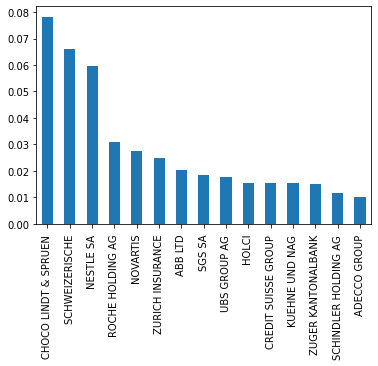

In [ ]:
w_plot.head(15).plot(kind="bar")

# Returns

In [ ]:
#this df has been uploaded in cleaned weights already
return_index

,Index
Date,
1/7/2001,-0.025640
1/8/2001,-0.044457
1/9/2001,-0.051006
1/10/2001,-0.112720
1/11/2001,0.040366
...,...
1/2/2022,-0.027723
1/3/2022,-0.030101
1/4/2022,0.023141


In [ ]:
ff_df = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='2001-7-1', end='2022-06-01')[0]
rf = ff_df["RF"]/100
ff_df = ff_df[['Mkt-RF', 'SMB', 'HML']]
ff_df.index = return_index.index
rf.index = return_index.index
ff_df

,Mkt-RF,SMB,HML
Date,,,
1/7/2001,-2.13,-4.19,5.21
1/8/2001,-6.46,2.48,2.30
1/9/2001,-9.25,-6.23,1.45
1/10/2001,2.46,7.49,-7.66
1/11/2001,7.54,-0.47,2.22
...,...,...,...
1/2/2022,-2.29,2.23,3.04
1/3/2022,3.05,-1.60,-1.80
1/4/2022,-9.46,-1.41,6.19


In [ ]:
x = ff_df/100
y = return_index
model = sm.OLS(y, x, missing='drop')
results = model.fit()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Index   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              2.315
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                      0.0764
Time:                        15:39:31   Log-Likelihood:                          476.72
No. Observations:                 252   AIC:                                     -947.4
Df Residuals:                     249   BIC:                                     -936.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
plot = return_index.reset_index()
plot

,Date,Index
0,1/7/2001,-0.025640
1,1/8/2001,-0.044457
2,1/9/2001,-0.051006
3,1/10/2001,-0.112720
4,1/11/2001,0.040366
...,...,...
247,1/2/2022,-0.027723
248,1/3/2022,-0.030101
249,1/4/2022,0.023141
250,1/5/2022,-0.007749


In [ ]:
#!pip install plotly
import plotly.express as px

In [ ]:
fig = px.line(plot, x="Date", y="Index", title='Plot of Return Index (Monthly)')
fig.show()

In [ ]:
#cumulative index

indexlist = plot['Index'].tolist()

newlist = [x+1 for x in indexlist]

x = 100
newlist= [x] + newlist

#newlist

In [ ]:
plot['Cumulative1'] = newlist[0:252]
plot

,Date,Index,Cumulative1
0,1/7/2001,-0.025640,100.000000
1,1/8/2001,-0.044457,0.974360
2,1/9/2001,-0.051006,0.955543
3,1/10/2001,-0.112720,0.948994
4,1/11/2001,0.040366,0.887280
...,...,...,...
247,1/2/2022,-0.027723,1.038172
248,1/3/2022,-0.030101,0.972277
249,1/4/2022,0.023141,0.969899
250,1/5/2022,-0.007749,1.023141


In [ ]:
plot['Cumulative Frequency'] = plot['Cumulative1'].cumprod()

In [ ]:
plot

,Date,Index,Cumulative1,Cumulative Frequency
0,1/7/2001,-0.025640,100.000000,100.000000
1,1/8/2001,-0.044457,0.974360,97.435965
2,1/9/2001,-0.051006,0.955543,93.104291
3,1/10/2001,-0.112720,0.948994,88.355433
4,1/11/2001,0.040366,0.887280,78.395987
...,...,...,...,...
247,1/2/2022,-0.027723,1.038172,390.310297
248,1/3/2022,-0.030101,0.972277,379.489708
249,1/4/2022,0.023141,0.969899,368.066509
250,1/5/2022,-0.007749,1.023141,376.584089


In [ ]:
fig2 = px.line(plot, x="Date", y="Cumulative Frequency", title="Cumulative Return of Fundamental Index")
fig2.show()

In [ ]:
prices_spi.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)

In [ ]:
prices_spi

,Date,SPI-Total Index Return,Unnamed: 2
0,01.06.2001,5206.79,NaN
1,01.07.2001,5048.65,NaN
2,01.08.2001,4775.11,NaN
3,01.09.2001,4458.20,NaN
4,01.10.2001,4032.03,NaN
...,...,...,...
248,01.02.2022,15654.34,NaN
249,01.03.2022,15019.41,NaN
250,01.04.2022,15569.35,NaN
251,01.05.2022,15406.15,NaN


In [ ]:
prices_spi=prices_spi.set_index('Date')

In [ ]:
prices_spi.drop(columns='Unnamed: 2',inplace=True)

In [ ]:
prices_spi

,SPI-Total Index Return
Date,
01.06.2001,5206.79
01.07.2001,5048.65
01.08.2001,4775.11
01.09.2001,4458.20
01.10.2001,4032.03
...,...
01.02.2022,15654.34
01.03.2022,15019.41
01.04.2022,15569.35


In [ ]:
ret_spi=prices_spi.pct_change()
ret_spi.head()

,SPI-Total Index Return
Date,
01.06.2001,NaN
01.07.2001,-0.030372
01.08.2001,-0.054181
01.09.2001,-0.066367
01.10.2001,-0.095592


In [ ]:
returns_spi=ret_spi.iloc[1:]
returns_spi = returns_spi.rename(columns={"SPI-Total Index Return": "SPI"})
returns_spi.head()

,SPI
Date,
01.07.2001,-0.030372
01.08.2001,-0.054181
01.09.2001,-0.066367
01.10.2001,-0.095592
01.11.2001,0.029214


In [ ]:

indexlist = returns_spi['SPI'].tolist()

newlist = [x+1 for x in indexlist]

x = 100
newlist= [x] + newlist

newlist

[100,
 0.969628120204579,
 0.9458191793845879,
 0.9336329424871888,
 0.9044076084518416,
 1.0292135723196503,
 1.0263866866514693,
 1.029023412187861,
 0.9723906784030812,
 1.0166004603548158,
 1.0528379663395402,
 0.9906940751182148,
 1.002327866240629,
 0.9154553964076932,
 0.8584423351468148,
 1.0008877102693472,
 0.9239828453386024,
 1.0348203545521926,
 1.0524999486301871,
 0.9051685669024297,
 0.9624741950392852,
 0.939008422676881,
 0.993662190311572,
 1.110035682426405,
 1.0488330330014743,
 0.9907317360681341,
 1.0707497360084477,
 1.0387448954079508,
 0.972531337168409,
 1.0565880004179888,
 1.010280461397518,
 1.0205680957508747,
 1.057386194397185,
 1.0136956542497828,
 0.980726704958917,
 1.028001296689839,
 0.9656557020924723,
 1.0094363127505122,
 0.9807670187680924,
 0.9890367916184108,
 1.0129004844475298,
 0.9823249506722957,
 1.017325196267808,
 1.0467901909484947,
 1.0083209766014791,
 1.0326069112223544,
 1.0017577762003822,
 1.0024699802401582,
 1.049005857602508,

In [ ]:
returns_spi['Cumulative1'] = newlist[0:252]

In [ ]:
returns_spi['Cumulative Frequency'] = returns_spi['Cumulative1'].cumprod()

In [ ]:
returns_spi

,SPI,Cumulative1,Cumulative Frequency
Date,,,
01.07.2001,-0.030372,100.000000,100.000000
01.08.2001,-0.054181,0.969628,96.962812
01.09.2001,-0.066367,0.945819,91.709287
01.10.2001,-0.095592,0.933633,85.622812
01.11.2001,0.029214,0.904408,77.437922
...,...,...,...
01.02.2022,-0.053008,1.054833,317.481596
01.03.2022,-0.040559,0.946992,300.652417
01.04.2022,0.036615,0.959441,288.458148


In [ ]:
fig3 = px.line(returns_spi, x=returns_spi.index, y="Cumulative Frequency", title='Plot of SPI Cumulative  Return')
fig3.show()

In [ ]:
import plotly.graph_objects as go

x1=plot['Date']
x2=plot['Date']
y1=plot['Cumulative Frequency']
y2= returns_spi['Cumulative Frequency']

fig2.add_trace(go.Scatter(x=x1,y=y2,name='SPI'))

In [ ]:
return_index=plot['Index']

In [ ]:
wealth_index=(1+return_index).cumprod()

In [ ]:
Roll_Max=wealth_index.cummax()

In [ ]:
plot['Drawdown']=(wealth_index-Roll_Max)/Roll_Max

In [ ]:
plot

,Date,Index,Cumulative1,Cumulative Frequency,Drawdown
0,1/7/2001,-0.025640,100.000000,100.000000,0.000000
1,1/8/2001,-0.044457,0.974360,97.435965,-0.044457
2,1/9/2001,-0.051006,0.955543,93.104291,-0.093195
3,1/10/2001,-0.112720,0.948994,88.355433,-0.195410
4,1/11/2001,0.040366,0.887280,78.395987,-0.162932
...,...,...,...,...,...
247,1/2/2022,-0.027723,1.038172,390.310297,-0.031829
248,1/3/2022,-0.030101,0.972277,379.489708,-0.060972
249,1/4/2022,0.023141,0.969899,368.066509,-0.039242
250,1/5/2022,-0.007749,1.023141,376.584089,-0.046687


In [ ]:
fig3 = px.line(plot, x="Date", y="Drawdown", title='Drawdown of the index portfolio')
fig3.show()

In [ ]:
libor3m

,Date,LIBOR3M
0,19.07.2001,0.032083
1,19.08.2001,0.031600
2,19.09.2001,0.027533
3,19.10.2001,0.022050
4,19.11.2001,0.022333
...,...,...
247,19.02.2022,-0.007530
248,19.03.2022,-0.007530
249,19.04.2022,-0.007530
250,19.05.2022,-0.007530


In [ ]:
libor3m.set_index('Date')
Rf=libor3m['LIBOR3M']

In [ ]:
monthly_mean=return_index.mean()
annual_mean=(1+monthly_mean)**12-1
monthly_std=return_index.std()

annualized_std=12**(0.5)*monthly_std
monthly_skew= sp.skew(return_index)
monthly_kurt = sp.kurtosis(return_index)+3
var_level=99
VaR99=np.percentile(return_index,100-var_level)
ES99=return_index[return_index<=VaR99].mean()
Drawdown=(wealth_index-Roll_Max)/Roll_Max
Max_Drawdown=-Drawdown.min()
avg_rf=Rf.mean()
Sharpe_ratio=(annual_mean-avg_rf)/annualized_std
Kalmar_ratio=annual_mean/Max_Drawdown

In [ ]:
results = {'Annual rate of return mean': [annual_mean], 'Annualized Volatility': [annualized_std],
               'Skewness': [monthly_skew], 'Kurtosis': [monthly_kurt], 
                'Value at risk': [VaR99], 'Max Drawdown': [Max_Drawdown],
               'Espected Shortfall': [ES99],'Sharpe ratio':[Sharpe_ratio], 'Kalmar ratio': [Kalmar_ratio]}
table = pd.DataFrame(results)

In [ ]:
table

,Annual rate of return mean,Annualized Volatility,Skewness,Kurtosis,Value at risk,Max Drawdown,Espected Shortfall,Sharpe ratio,Kalmar ratio
0,0.072321,0.126807,-0.438187,5.2614,-0.103599,0.483354,-0.113633,0.548176,0.149623


In [ ]:
spi_ret=returns_spi['SPI']

In [ ]:
wealth_spi=(1+spi_ret).cumprod()

In [ ]:
Roll_Max_spi=wealth_spi.cummax()

In [ ]:
Drawdown_spi=(wealth_spi-Roll_Max_spi)/Roll_Max_spi
Drawdown_spi

Date
01.07.2001    0.000000
01.08.2001   -0.054181
01.09.2001   -0.116952
01.10.2001   -0.201365
01.11.2001   -0.178034
                ...   
01.02.2022   -0.053008
01.03.2022   -0.091418
01.04.2022   -0.058150
01.05.2022   -0.068022
01.06.2022   -0.107106
Name: SPI, Length: 252, dtype: float64

In [ ]:
returns_spi['Drawdown SPI']=Drawdown_spi

In [ ]:
fig3.add_trace(go.Scatter(x=x1,y=returns_spi['Drawdown SPI'], name = "Drawdown SPI"))

In [ ]:
#getting the same statisical results for the SPI 
monthly_mean_spi=spi_ret.mean()
annual_mean_spi=(1+monthly_mean_spi)**12-1
monthly_std_spi=spi_ret.std()
annualized_std_spi=12**(0.5)*monthly_std_spi
monthly_skew_spi= sp.skew(spi_ret)
monthly_kurt_spi = sp.kurtosis(spi_ret)+3
var_level=99
VaR99_spi=np.percentile(spi_ret,100-var_level)
ES99_spi=spi_ret[spi_ret<=VaR99_spi].mean()
Drawdown_spi=(wealth_spi-Roll_Max_spi)/Roll_Max_spi
Max_Drawdown_spi=-Drawdown_spi.min()
#13 December, the 2year Switzerland Bond yield=1.049%, we will take as approximate of risk-free rate
Rf=0.0149
Sharpe_ratio_spi= (annual_mean_spi-Rf)/annualized_std_spi
Kalmar_ratio_spi=annual_mean_spi/Max_Drawdown_spi

In [ ]:
results = {'Annual rate of return mean': [annual_mean_spi], 'Annualized Volatility': [annualized_std_spi],
               'Skewness': [monthly_skew_spi], 'Kurtosis': [monthly_kurt_spi], 
                'Value at risk': [VaR99_spi], 'Max Drawdown': [Max_Drawdown_spi],
               'Espected Shortfall': [ES99_spi],'Sharpe ratio':[Sharpe_ratio_spi], 'Kalmar ratio': [Kalmar_ratio_spi]}
table = pd.DataFrame(results)

In [ ]:
table

,Annual rate of return mean,Annualized Volatility,Skewness,Kurtosis,Value at risk,Max Drawdown,Espected Shortfall,Sharpe ratio,Kalmar ratio
0,0.061415,0.14086,-0.637906,4.009269,-0.102092,0.518895,-0.126287,0.330219,0.118357
